C:\Users\98269\AppData\Local\Temp\ipykernel_97952\1908464935.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name)
C:\Users\98269\AppData\Local\Temp\ipykernel_97952\1908464935.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name)
C:\Users\98269\AppData\Local\Temp\ipykernel_97952\1908464935.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


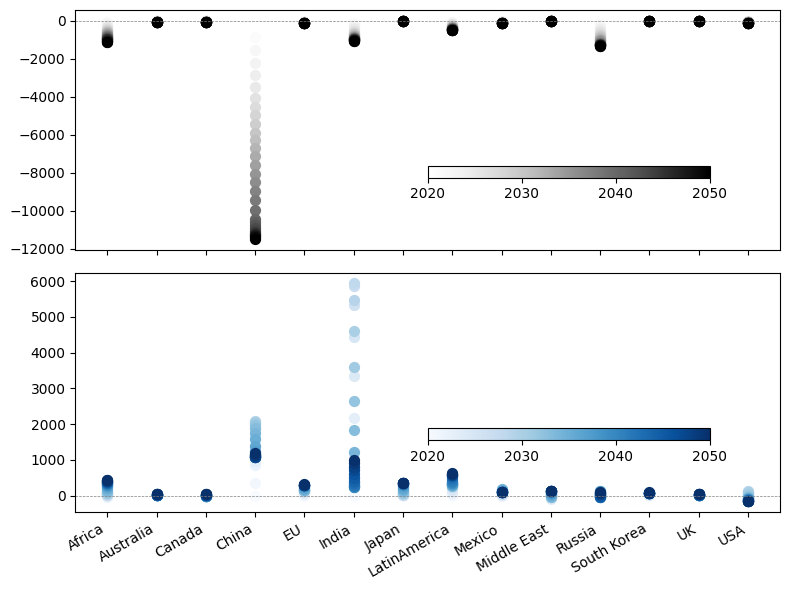

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 1️⃣ 读取 Excel 文件
file_path = 'Sectoral and Regional Variations.xlsx'  # 你需要改成自己的文件名
sheet_names = ['dirty', 'clean']

# 2️⃣ 定义 Code-Region 映射表
code_region_mapping = {
    1: 'Africa',
    2: 'Australia',
    3: 'Canada',
    4: 'China',
    5: 'LatinAmerica',
    7: 'Russia',
    8: 'India',
    9: 'Japan',
    10: 'Middle East',
    11: 'Mexico',
    13: 'South Korea',
    14: 'UK',
    15: 'USA',
    16: 'EU'
}

# 3️⃣ 函数：处理单个 sheet
def process_and_plot(sheet_name, ax, cmap_name='Oranges'):
    # 读取数据
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    # 把 code 转成 region
    df['Region'] = df['Code'].map(code_region_mapping)
    df = df.dropna(subset=['Code'])

    # 按 Region 汇总
    year_columns = [col for col in df.columns if str(col).isdigit()]
    df_grouped = df.groupby('Region')[year_columns].sum().reset_index()

    # 画散点图
    regions = df_grouped['Region'].tolist()
    x_pos = range(len(regions))
    norm = mcolors.Normalize(vmin=int(min(year_columns)), vmax=int(max(year_columns)))
    cmap = plt.cm.get_cmap(cmap_name)
    for year in year_columns:
        colors = cmap(norm(int(year)))

        ax.scatter(x_pos, df_grouped[year], color=colors, s=50)
    ax.axhline(0, linestyle='--', color='grey',linewidth=0.5)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(regions, rotation=30, ha='right')
        # 颜色条
    cax = inset_axes(ax, width="40%", height="5%", loc='lower center',
                     bbox_to_anchor=(0.2,0.3, 1, 1),
                     bbox_transform=ax.transAxes, borderpad=0)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
    cbar.set_ticks([2020, 2030, 2040, 2050]) 

# 4️⃣ 开始画图
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# 第一个 sheet
process_and_plot(sheet_names[0], axes[0], cmap_name='Greys')

# 第二个 sheet
process_and_plot(sheet_names[1], axes[1], cmap_name='Blues')
plt.savefig("Employment Change.png", dpi=300,bbox_inches='tight')

plt.tight_layout()
plt.show()

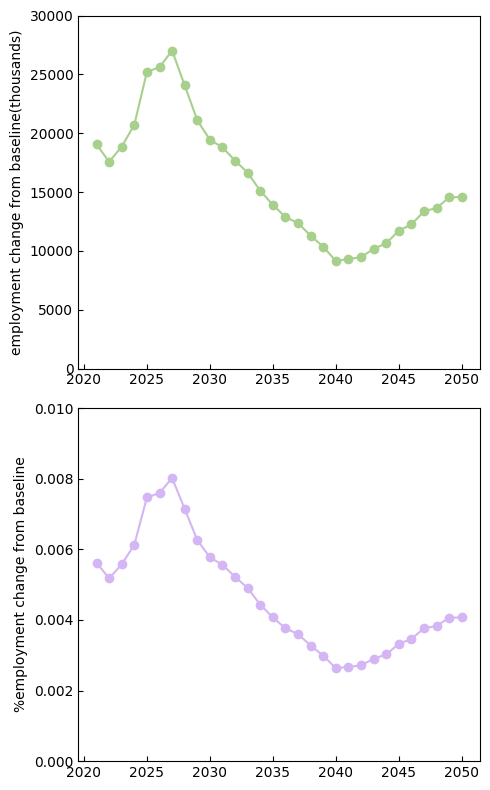

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating a DataFrame using the given data
data = {
    "YEAR": [2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
    "absolute value": [19049.5682, 17567.7967, 18865.8304, 20714.2679, 25219.6774, 25606.1342, 27023.6739, 24058.4692, 21101.8003, 19442.2044, 18793.8252, 17668.8953, 16646.53, 15104.6058, 13918.5085, 12876.0822, 12368.6928, 11288.4737, 10363.9266, 9146.0553, 9309.8767, 9468.3421, 10180.6014, 10640.2208, 11725.8967, 12245.5321, 13355.7792, 13653.519, 14539.0892, 14592.0774],
    "relative value": [0.00561, 0.00518, 0.00557, 0.00613, 0.00747, 0.00759, 0.00802, 0.00714, 0.00626, 0.00577, 0.00556, 0.00522, 0.0049, 0.00443, 0.00407, 0.00376, 0.0036, 0.00327, 0.00299, 0.00263, 0.00267, 0.00271, 0.0029, 0.00302, 0.00332, 0.00346, 0.00376, 0.00383, 0.00406, 0.00407]
}

df = pd.DataFrame(data)

# Plotting the two line charts in two subplots
fig, ax = plt.subplots(2, 1, figsize=(5, 8))

# Plotting absolute value on the first subplot
ax[0].plot(df['YEAR'], df['absolute value'], marker='o', color='#A8D08D', label='Absolute Value')
ax[0].set_ylabel('employment change from baseline(thousands)')
ax[0].set_ylim(0, 30000)
ax[0].tick_params(direction='in')
# Plotting relative value on the second subplot
ax[1].plot(df['YEAR'], df['relative value'], marker='o', color='#D3B6F3', label='Relative Value')
ax[1].set_ylabel('%employment change from baseline')
ax[1].set_ylim(0, 0.01)
ax[1].tick_params(direction='in')
# Adjusting layout to avoid overlap
plt.tight_layout()

plt.savefig("labor1.png", bbox_inches='tight')
# Display the plot
plt.show()


30.133304450454002


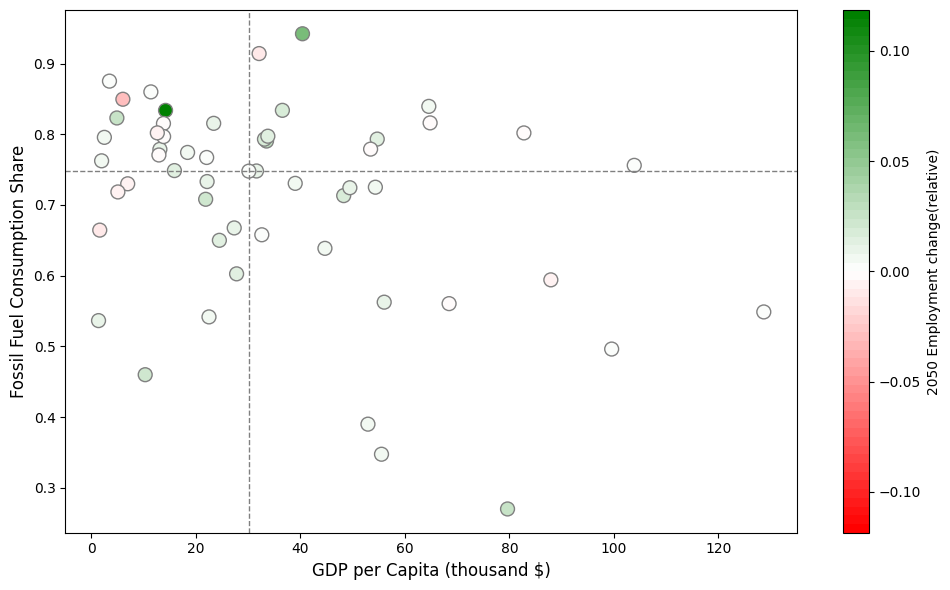

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

Distribution = pd.read_excel("Sectoral and Regional Variations.xlsx",sheet_name="distribution")
Distribution = Distribution.dropna()
# 假设数据框中的列名称分别为 'GDPper'，'Fuelshare'，'employment_2050'，'Country'，请根据实际修改
GDPper = Distribution['GDPper']  # GDP列

Fuelshare = Distribution['Fuelshare']  # 燃料份额列
employment_rel = Distribution['employment_relative'] 
employment_2050 = Distribution['employment_2050'] # 2050年就业列
countries = Distribution['Country']  
# 将GDP除以1000（转换为千美元）
Distribution["gdp"] = [x / 1000 for x in GDPper]
gdp = Distribution["gdp"] 
colors = ['red', 'white', 'green']  # 定义黄色到白色到绿色的渐变
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=60)

sizes = Distribution["employment_2050"] # 缩放后的圆圈大小



# 创建散点图
plt.figure(figsize=(10, 6))
scatter = plt.scatter(gdp, Fuelshare, c=employment_rel, cmap=cmap, s=100, vmin=-max(abs(employment_rel)), vmax=max(abs(employment_rel)),edgecolor='gray', linewidth=1)



plt.xlabel('GDP per Capita (thousand $)', fontsize=12)
plt.ylabel('Fossil Fuel Consumption Share', fontsize=12)

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('2050 Employment change(relative)')

fuelshare_median = np.median(Fuelshare)
gdp_median = np.median(gdp)
print(gdp_median)
# 横向虚线为 Fuelshare 的中位值
plt.axhline(y=fuelshare_median, color='grey', linestyle='--', linewidth=1)
# 竖向虚线为 GDP 的中位值
plt.axvline(x=gdp_median, color='grey', linestyle='--', linewidth=1)

plt.savefig("Employment Change& GDP.png", dpi=300,bbox_inches='tight')
# 显示图形

plt.tight_layout()
plt.show()


    E3MEregion                                           geometry  id_x  \
0          1.0  POLYGON ((2.5218 51.08754, 2.542 51.09687, 2.5...     1   
1          2.0  MULTIPOLYGON (((-48.84667 61.27985, -48.87873 ...     2   
2          3.0  MULTIPOLYGON (((6.72242 53.58462, 6.73357 53.5...     3   
3          4.0  MULTIPOLYGON (((23.32057 35.83853, 23.29566 35...     4   
4          5.0  MULTIPOLYGON (((-17.87926 27.81452, -17.88512 ...     5   
..         ...                                                ...   ...   
63        66.0  MULTIPOLYGON (((29.04053 -28.92299, 29.04968 -...    66   
64        67.0  MULTIPOLYGON (((33.9756 26.79003, 33.99545 26....    67   
65        68.0  MULTIPOLYGON (((12.93394 -5.87382, 12.95378 -5...    68   
66        69.0  MULTIPOLYGON (((41.06568 -2.03631, 41.09278 -2...    69   
67        70.0  MULTIPOLYGON (((53.62778 24.17194, 53.64332 24...    70   

                            region_x   re_2030   re_2050  id_y  \
0                            Belg

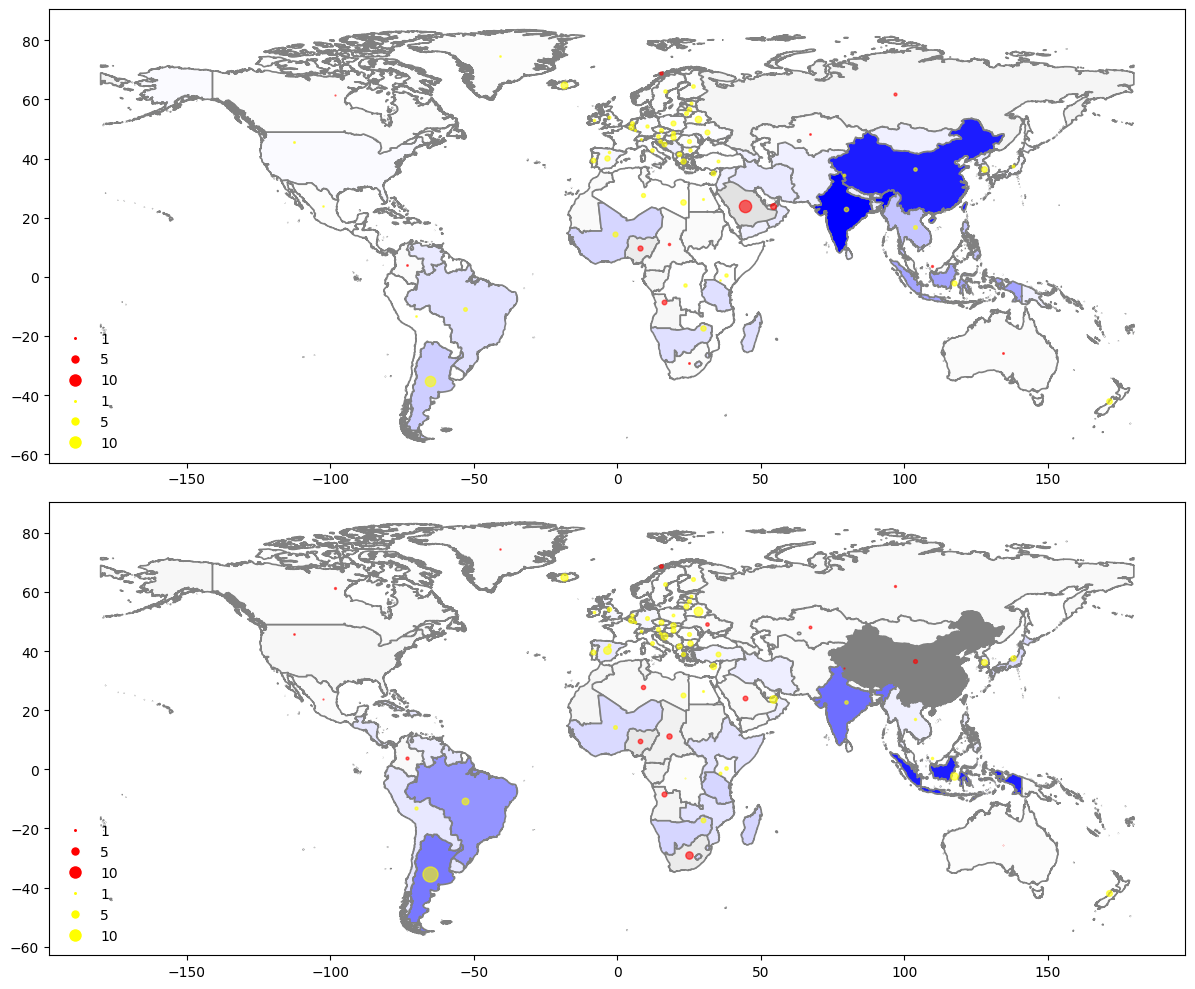

In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.lines as mlines

world = gpd.read_file("ne_10m_admin_0_countries.shp")
world = world[world['SOVEREIGNT'] != 'Antarctica']      

region_map = pd.read_excel('E3ME_REGION.xlsx',
                           sheet_name='E3ME_REGION_COUNTRY')  # ADMIN → E3MEregion
gdf0 = world.merge(region_map, left_on='ADMIN', right_on='name', how='left')

regions_geo = (
    gdf0[['E3MEregion', 'geometry']]
    .dissolve(by='E3MEregion')      # 合并几何
    .reset_index()                  # 变回普通列
)

rel_df  = pd.read_excel('map_data.xlsx', sheet_name='relative change')
tot_df  = pd.read_excel('map_data.xlsx', sheet_name='total change')

merge_data_re = regions_geo.merge(rel_df, left_on='E3MEregion', right_on='id', how='left')
merge_data2 = merge_data_re.merge(tot_df, left_on='E3MEregion', right_on='id', how='left')
print(merge_data2[:68])

cmap = mcolors.LinearSegmentedColormap.from_list(
        'custom_cmap', ['gray', 'white', 'blue'], N=256)

vmin = merge_data2[['to_2030', 'to_2050']].min().min()
vmax = merge_data2[['to_2030', 'to_2050']].max().max()

def plot_region(ax, gdf, re_col, to_col):
    # 背景填色
    gdf.plot(column=re_col, ax=ax, cmap=cmap,
             vmin=vmin, vmax=vmax,
             edgecolor='gray', linewidth=1.2,
             legend=False,
             missing_kwds={'color':'white', 'hatch':'///', 'alpha':0.2})

    # 圆点（每行就是一区域，保证“一区域一圆”）
    for _, row in gdf.iterrows():
        # 跳过无效几何
        if row.geometry.is_empty:
            continue
        
        cen = row.geometry.centroid

        # 跳过无效质心
        if not cen.is_valid or np.isnan(cen.x) or np.isnan(cen.y):
            continue
        
        size  = abs(row[to_col]) * 1000          # 大小按绝对值放大
        color = 'red' if row[to_col] < 0 else 'yellow'
        ax.scatter(cen.x, cen.y, s=size, color=color, alpha=0.6)
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
plot_region(axes[0], merge_data2, 'to_2030', 're_2030')
plot_region(axes[1], merge_data2, 'to_2050', 're_2050')

sizes, labels = [10, 50, 100], ['1', '5', '10']
handles = [mlines.Line2D([], [], marker='o', linestyle='',
                         markerfacecolor=mc, markeredgecolor='w',
                         markersize=np.sqrt(sz), label=lb)
           for mc in ('red', 'yellow') for sz, lb in zip(sizes, labels)]
axes[0].legend(handles=handles, loc='lower left', frameon=False)
axes[1].legend(handles=handles, loc='lower left', frameon=False)
plt.tight_layout()
plt.savefig("labor_map_final.png", bbox_inches='tight')